In [1]:
import pickle 
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import pandas as pd

# 1. 定义要加载的文件的路径
filename_to_load = "NoisyAG-News.pkl"

# 2. 使用 pd.read_pickle() 加载文件
# 我们将加载后的数据存放在一个新的变量中，例如 df_loaded
try:
    df_loaded = pd.read_pickle(filename_to_load)
    
except FileNotFoundError:
    print(f"❌ 错误: 文件 '{filename_to_load}' 未找到。请确保文件名和路径正确。")
    
print(df_loaded.columns)

Index(['sample_index', 'text', 'ground_truth', 'human_label_1',
       'human_label_2', 'human_label_3', 'human_best_label',
       'human_middle_label', 'human_worst_label', 'gemini_2.5_pro_label',
       'gpt4_label', 'claude4_label', 'SOTA_llm_best_label',
       'SOTA_llm_middle_label', 'SOTA_llm_worst_label', 'mistral_3b_label',
       'mistral_8b_label', 'mistral_latest_label', 'mistral_multi_best_label',
       'mistral_multi_middle_label', 'mistral_multi_worst_label',
       'mistral_8b_temp1.5_run1', 'mistral_8b_temp1.5_run2',
       'mistral_8b_temp1.5_run3', 'mistral_8b_best_label',
       'mistral_8b_middle_label', 'mistral_8b_worst_label',
       'noise_instance_best', 'noise_instance_med', 'noise_instance_worst',
       'noise_sameNTM_best', 'noise_sameNTM_med', 'noise_sameNTM_worst',
       'noise_single_best', 'noise_single_med', 'noise_single_worst',
       'noise_uniform_best', 'noise_uniform_med', 'noise_uniform_worst'],
      dtype='object')


In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings

# 忽略未来版本Pandas可能产生的警告，使输出更整洁
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. 定义要加载的文件的路径
filename_to_load = "NoisyAG-News.pkl"

# 2. 使用 pd.read_pickle() 加载文件
try:
    df_loaded = pd.read_pickle(filename_to_load)
    print(f"✅ 文件 '{filename_to_load}' 加载成功。")
    print(f"   数据集包含 {len(df_loaded)} 行 和 {len(df_loaded.columns)} 列。")
    
except FileNotFoundError:
    print(f"❌ 错误: 文件 '{filename_to_load}' 未找到。请确保文件名和路径正确。")
    # 如果文件未找到，则退出程序
    exit()

# 3. 定义真实标签列和需要排除的非标签列
ground_truth_column = 'ground_truth'
# 这些列不是预测标签，因此在计算准确率时需要跳过
columns_to_exclude = ['sample_index', 'text', 'ground_truth']

# 检查真实标签列是否存在
if ground_truth_column not in df_loaded.columns:
    print(f"❌ 错误: 数据集中未找到真实标签列 '{ground_truth_column}'。")
    exit()

# 提取真实标签 Series
y_true = df_loaded[ground_truth_column]

# 4. 遍历所有列，计算准确率
print("\n🧮 正在计算每一列相对于 'ground_truth' 的准确率...")
accuracy_results = {}
conSet = {}

for column in df_loaded.columns:
    # 如果当前列不是需要排除的列
    if column not in columns_to_exclude:
        # 提取预测标签 Series
        y_pred = df_loaded[column]
        
        # 使用 scikit-learn 的 accuracy_score 计算准确率
        # 这个函数能自动处理 NaN 值（通过不将其计入总数）
        acc = accuracy_score(y_true, y_pred)
        con = confusion_matrix(y_true,y_pred)
        
        
        # 将结果存入字典
        accuracy_results[column] = acc
        conSet[column] = con 

# 5. 将结果按准确率从高到低排序，并格式化输出
if accuracy_results:
    # 将结果字典转换为 (列名, 准确率) 的元组列表，并排序
    sorted_results = sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True)
    
    print("\n--- 📊 各标签列准确率排行榜 ---")
    print("-" * 50)
    # 格式化输出，使列名对齐，准确率显示为百分比
    for col_name, acc_score in sorted_results:
        print(f"{col_name:<35} | 准确率: {acc_score:.2%}")
        # print(conSet[col_name])
    print("-" * 50)
else:
    print("⚠️ 未找到可计算准确率的标签列。")

✅ 文件 'NoisyAG-News.pkl' 加载成功。
   数据集包含 50000 行 和 39 列。

🧮 正在计算每一列相对于 'ground_truth' 的准确率...

--- 📊 各标签列准确率排行榜 ---
--------------------------------------------------
SOTA_llm_best_label                 | 准确率: 94.14%
noise_sameNTM_best                  | 准确率: 90.35%
noise_instance_best                 | 准确率: 90.27%
noise_uniform_best                  | 准确率: 90.20%
human_best_label                    | 准确率: 90.19%
mistral_multi_best_label            | 准确率: 90.01%
noise_single_best                   | 准确率: 89.86%
claude4_label                       | 准确率: 89.52%
SOTA_llm_middle_label               | 准确率: 87.98%
gpt4_label                          | 准确率: 86.90%
mistral_8b_best_label               | 准确率: 86.59%
gemini_2.5_pro_label                | 准确率: 85.79%
mistral_latest_label                | 准确率: 83.98%
SOTA_llm_worst_label                | 准确率: 82.09%
noise_single_med                    | 准确率: 80.24%
noise_sameNTM_med                   | 准确率: 80.19%
human_middle_label                 

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# --- 设置绘图样式和字体 ---
sns.set_theme(style="whitegrid", font='SimHei', rc={"axes.unicode_minus": False})

# --- 加载数据并定义关键列 ---
try:
    df = pd.read_pickle("NoisyAG-News.pkl")
    print("✅ 文件 'NoisyAG-News_regenerated.pkl' 加载成功。")
except FileNotFoundError:
    print("❌ 错误: 文件 'NoisyAG-News_regenerated.pkl' 未找到。")
    exit()

# 定义我们选定的列
GROUND_TRUTH_COL = 'ground_truth'
HUMAN_LABEL_COL = 'human_label_1'
LLM_LABEL_COL = 'gemini_2.5_pro_label'

# 类别名称映射，用于绘图
CLASS_NAMES = ['World', 'Sports', 'Business', 'Sci/Tech']

✅ 文件 'NoisyAG-News_regenerated.pkl' 加载成功。



--- 正在执行证据链第一步：现象确认 ---


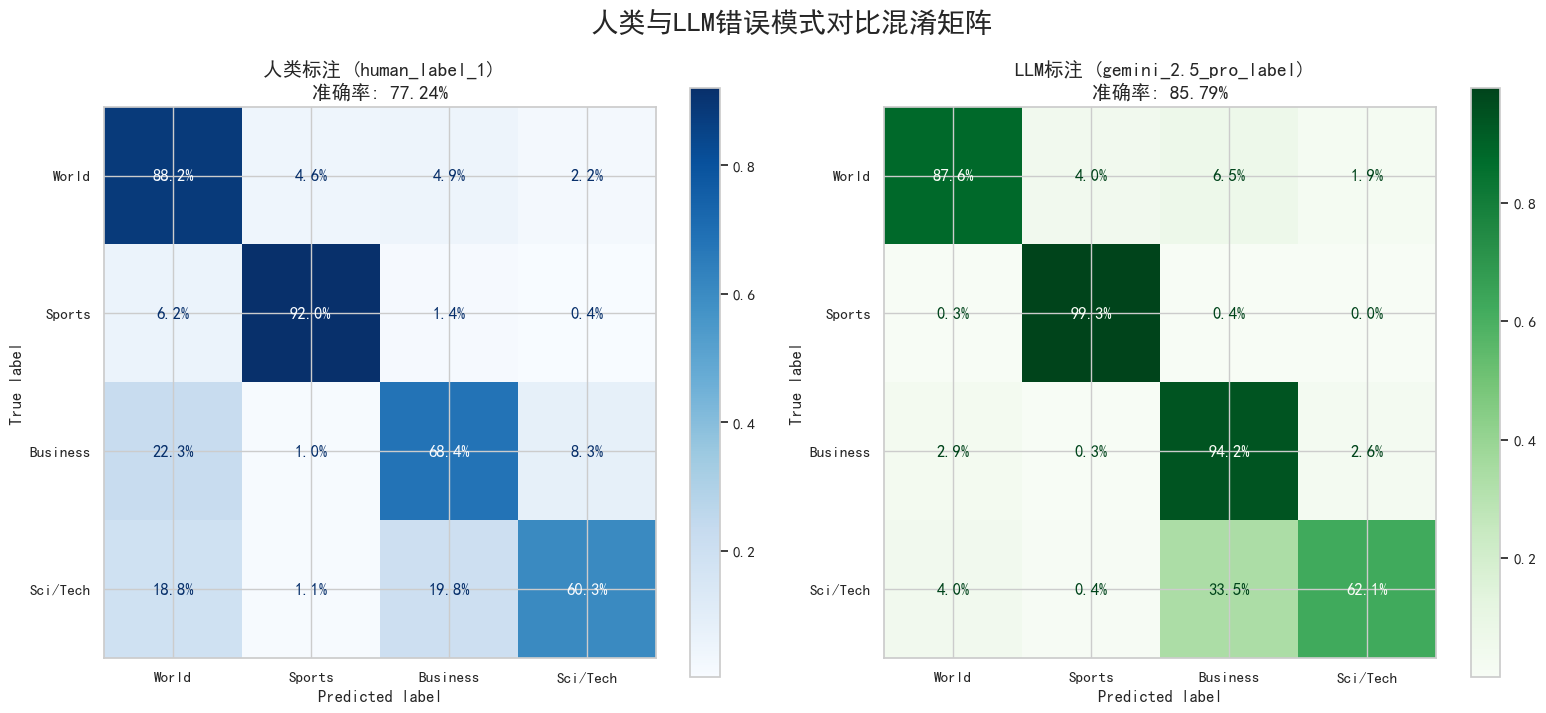

✅ 第一步完成。请查看生成的对比混淆矩阵图。


In [6]:

# --- Level 1: Phenomenon Confirmation ---
print("\n--- 正在执行证据链第一步：现象确认 ---")

# 创建一个 1x2 的子图布局
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('人类与LLM错误模式对比混淆矩阵', fontsize=20)

# 绘制人类混淆矩阵
y_true = df[GROUND_TRUTH_COL]
y_pred_human = df[HUMAN_LABEL_COL]
cm_human = confusion_matrix(y_true, y_pred_human, normalize='true')
disp_human = ConfusionMatrixDisplay(confusion_matrix=cm_human, display_labels=CLASS_NAMES)
disp_human.plot(ax=axes[0], cmap='Blues', values_format='.1%')
axes[0].set_title(f'人类标注 ({HUMAN_LABEL_COL})\n准确率: {accuracy_score(y_true, y_pred_human):.2%}', fontsize=14)

# 绘制LLM混淆矩阵
y_pred_llm = df[LLM_LABEL_COL]
cm_llm = confusion_matrix(y_true, y_pred_llm, normalize='true')
disp_llm = ConfusionMatrixDisplay(confusion_matrix=cm_llm, display_labels=CLASS_NAMES)
disp_llm.plot(ax=axes[1], cmap='Greens', values_format='.1%')
axes[1].set_title(f'LLM标注 ({LLM_LABEL_COL})\n准确率: {accuracy_score(y_true, y_pred_llm):.2%}', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("step1_confusion_matrix_comparison.png", dpi=300)
plt.show()

print("✅ 第一步完成。请查看生成的对比混淆矩阵图。")

0.77238


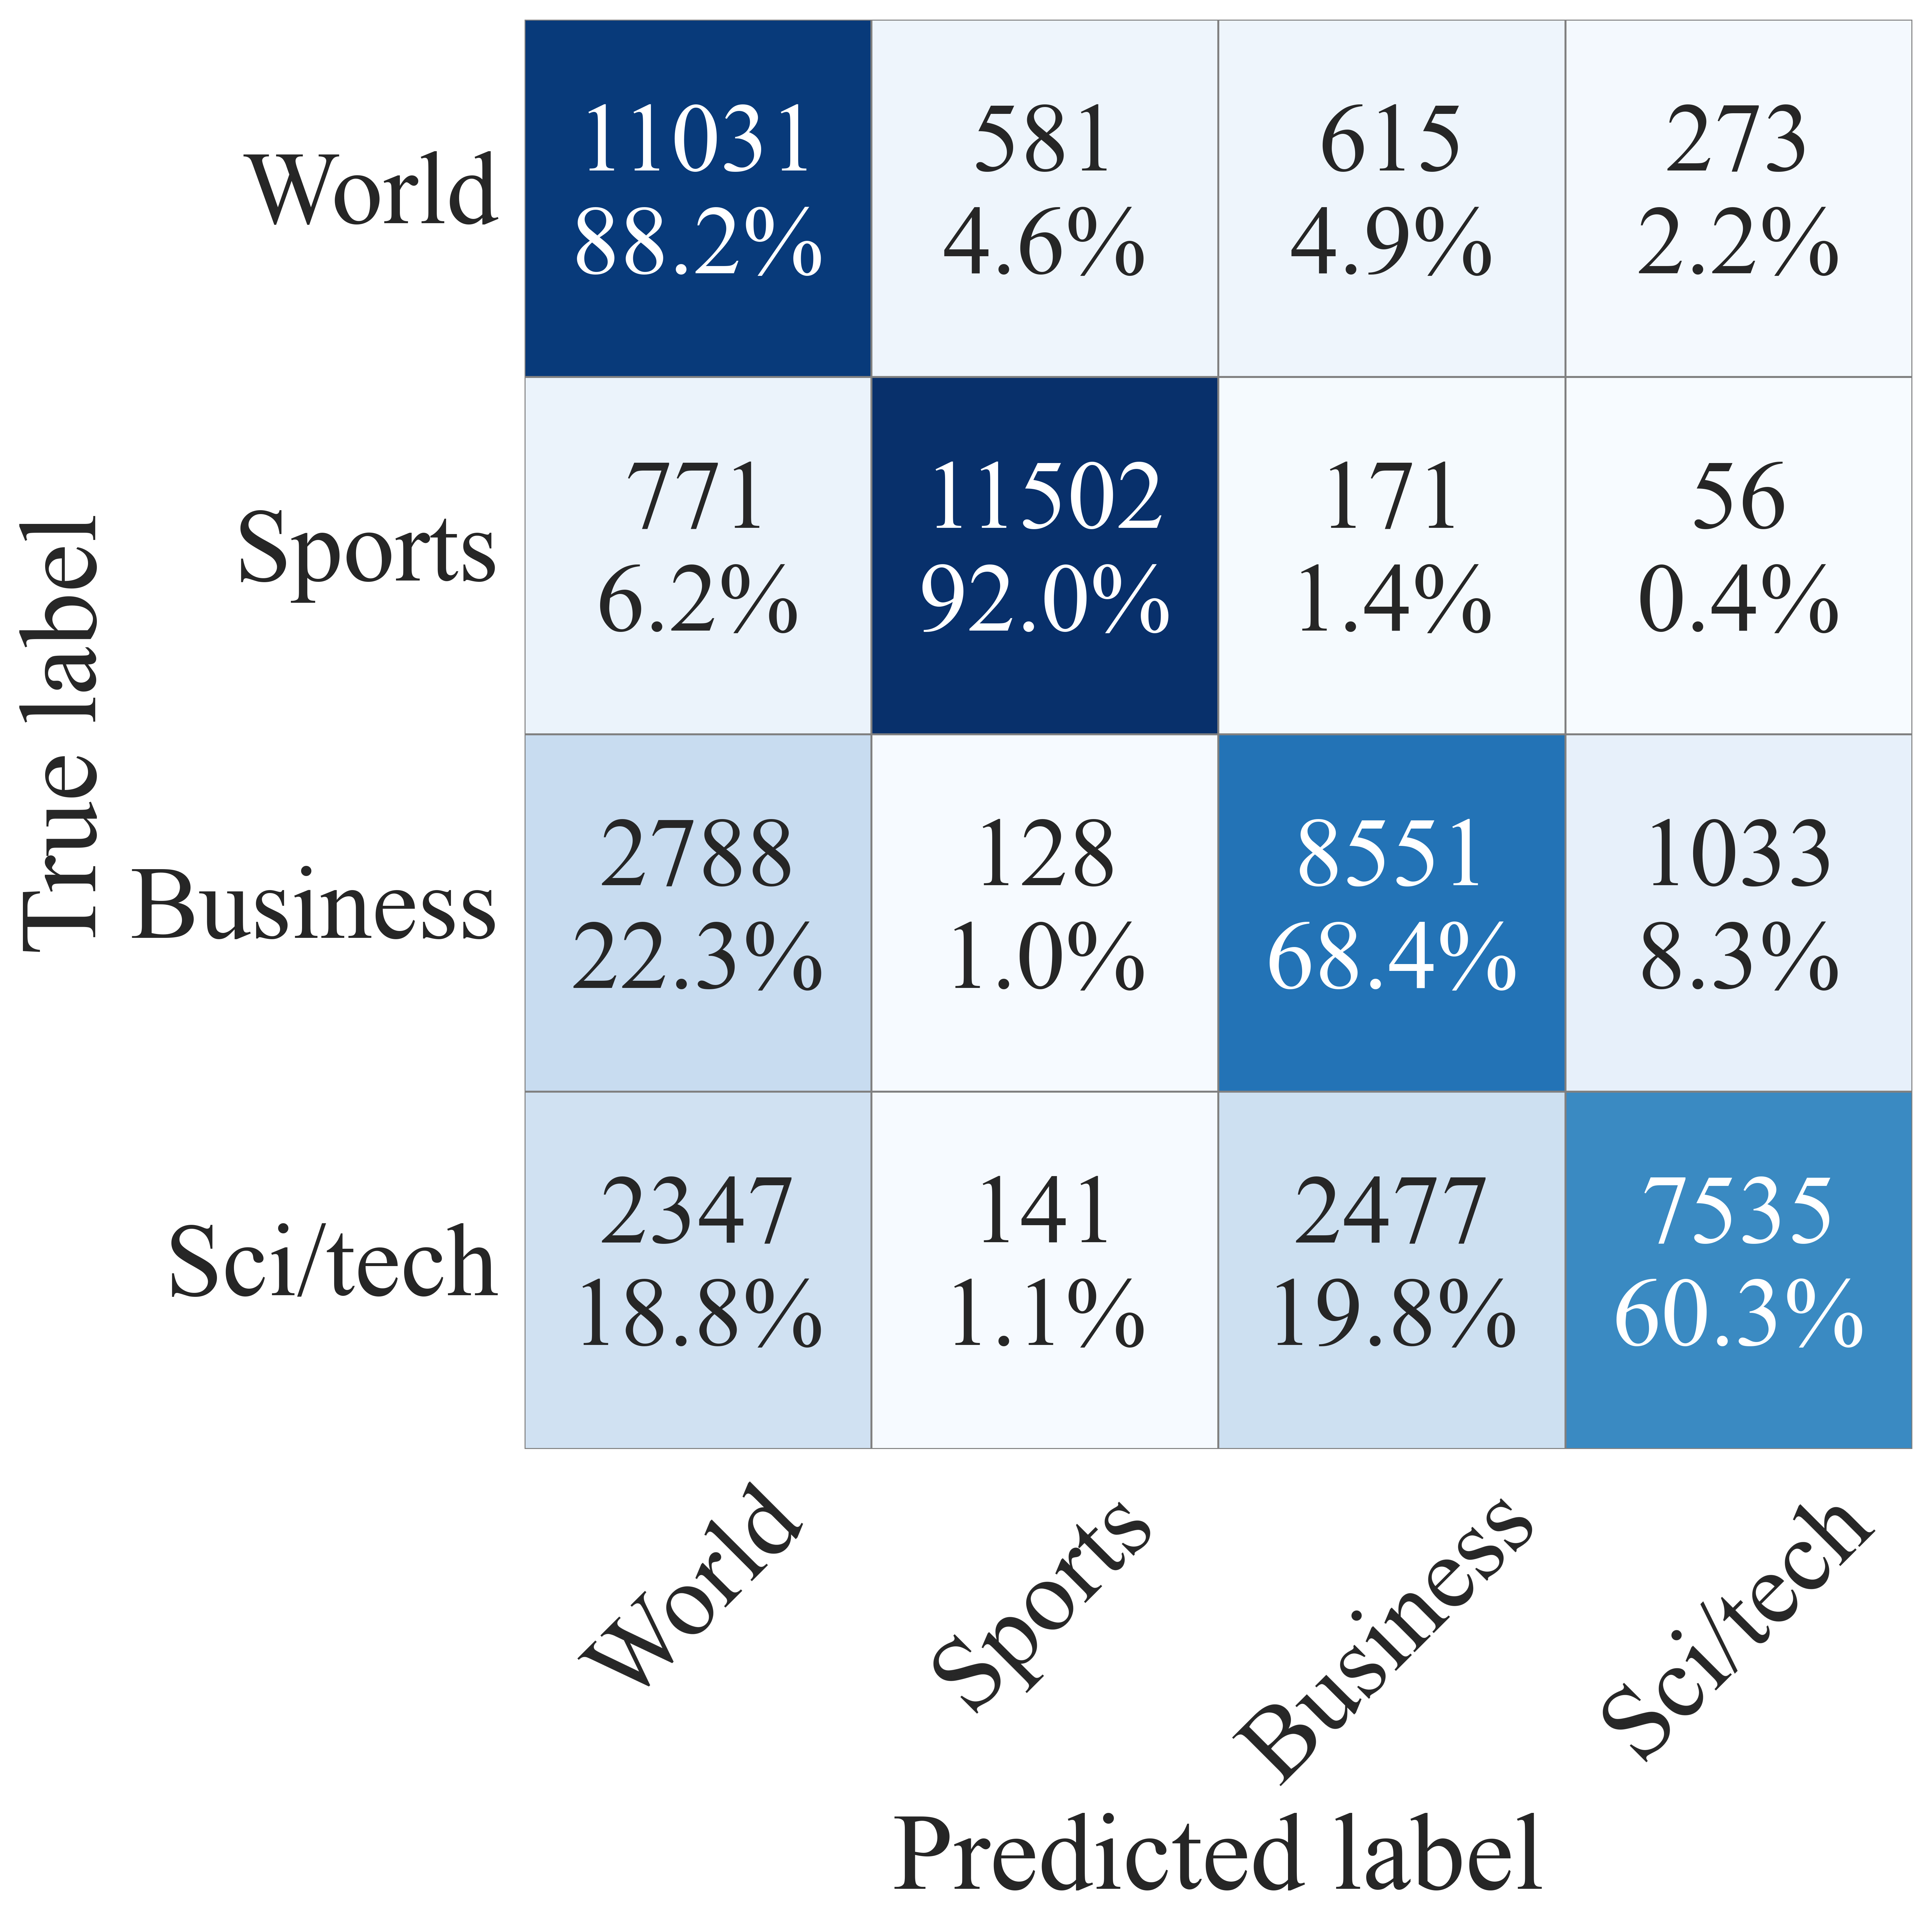

In [11]:
import numpy as np
# print(confusion_matrix(gt,bestL))
print(accuracy_score(y_true,y_pred_human))
conf_mat = np.array(confusion_matrix(y_true,y_pred_human))  
row_sums = conf_mat.sum(axis=1, keepdims=True)
annot = np.empty_like(conf_mat, dtype=object)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        percent = conf_mat[i, j] / row_sums[i, 0] * 100
        annot[i, j] = f"{conf_mat[i, j]}\n{percent:.1f}%"
FIG_SIZE = (10,10)
ANNOT_FONT_SIZE = 36
TICK_FONT_SIZE = 38
LABEL_FONT_SIZE = 40
categories = ["World","Sports","Business","Sci/tech"]
FONT_FAMILY = "Times New Roman"

plt.figure(figsize=FIG_SIZE, dpi=600) 
ax = sns.heatmap(
    conf_mat, 
    annot=annot,
    fmt='', 
    cmap='Blues',
    # cmap='GnBu',
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'size': ANNOT_FONT_SIZE, 'fontname': FONT_FAMILY}
)

ax.set_xticklabels(categories, rotation=45, fontsize=TICK_FONT_SIZE,fontname=FONT_FAMILY)
ax.set_yticklabels(categories, rotation=0, fontsize=TICK_FONT_SIZE,fontname=FONT_FAMILY)
ax.set_xlabel('Predicted label', fontsize=LABEL_FONT_SIZE, fontname=FONT_FAMILY)
ax.set_ylabel('True label', fontsize=LABEL_FONT_SIZE, fontname=FONT_FAMILY)
# ax.set_title('Confusion Matrix', fontsize=TITLE_FONT_SIZE, fontname=FONT_FAMILY, pad=20)
plt.tight_layout()

plt.show()

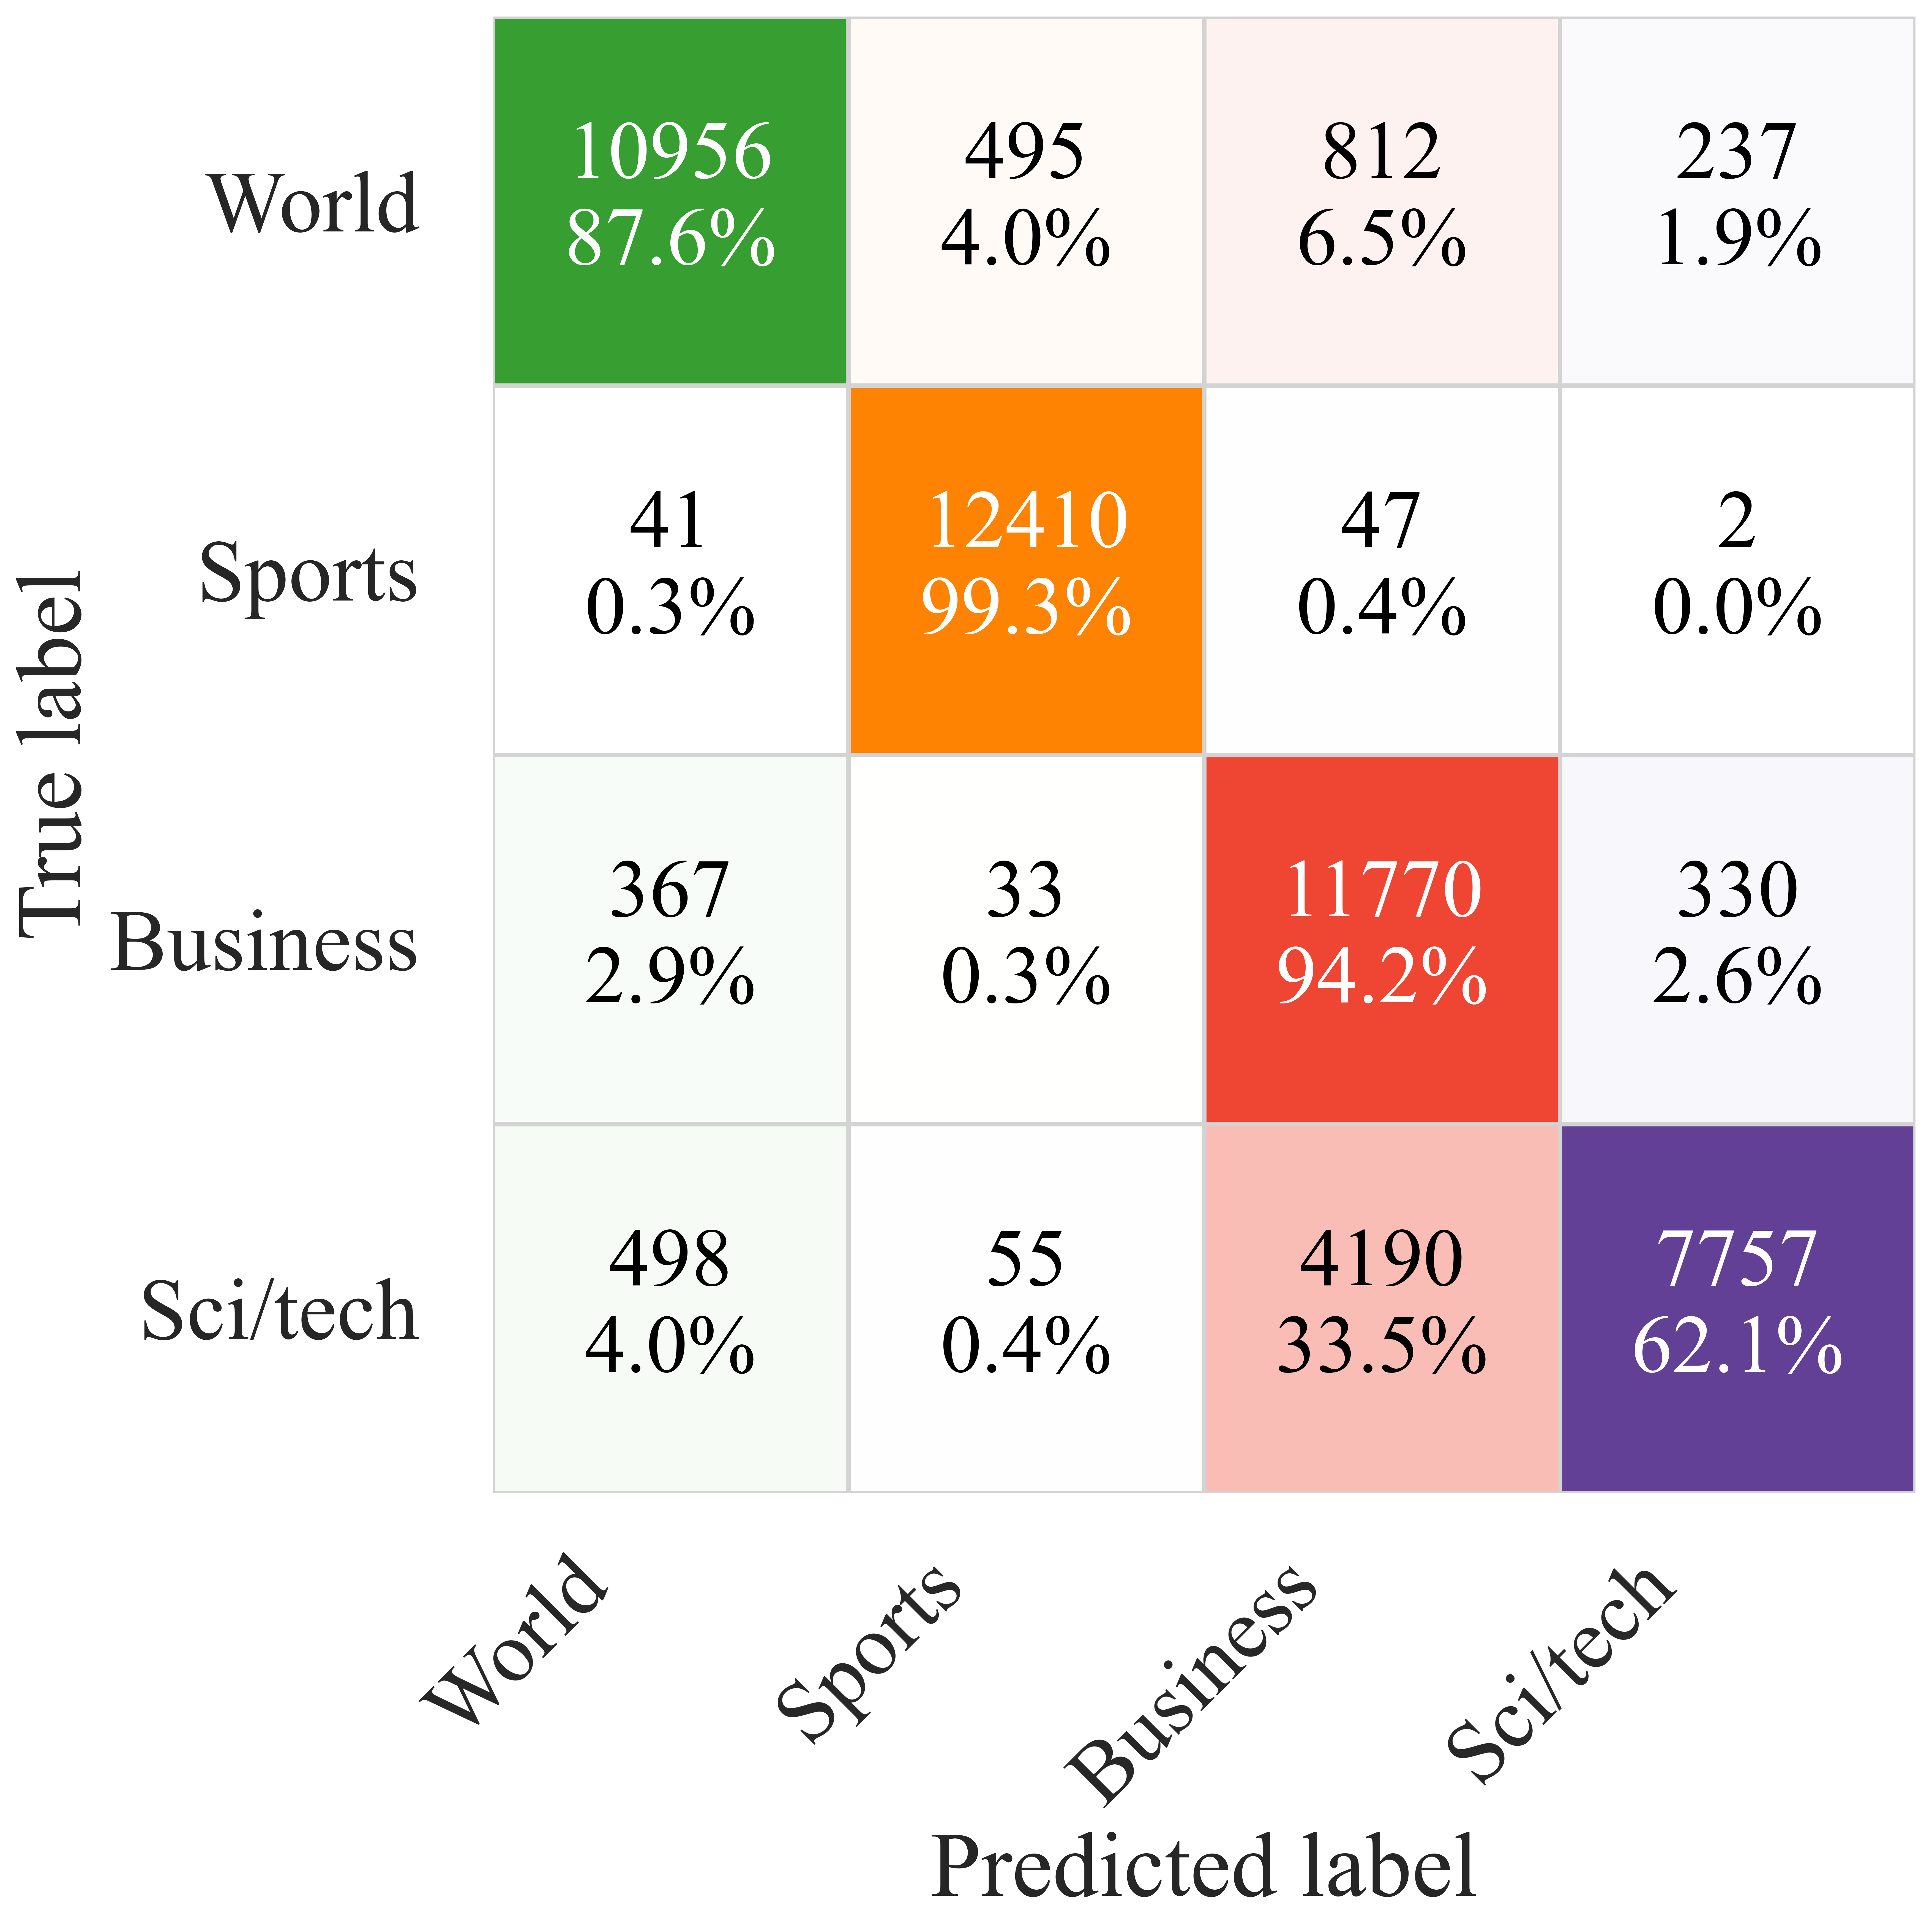

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import matplotlib.patches as patches

# --- 1. 设置与您的论文风格匹配的参数 ---
FIG_SIZE = (12, 12)
ANNOT_FONT_SIZE = 36
TICK_FONT_SIZE = 38
LABEL_FONT_SIZE = 40
categories = ["World   ", "Sports   ", "Business   ", "Sci/tech   "]
FONT_FAMILY = "Times New Roman"

# --- 2. 定义您为每个类别指定的基准颜色 ---
world_color = np.array(to_rgb('#379E31'))    # RGB(55,158,49)
sports_color = np.array(to_rgb('#FE8302'))   # RGB(254,131,2)
business_color = np.array(to_rgb('#EF4633')) # RGB(239,70,51)
scitech_color = np.array(to_rgb('#624096'))  # RGB(98,64,150)
class_colors = [world_color, sports_color, business_color, scitech_color]

# --- 3. 您的混淆矩阵数据 ---
# conf_mat = np.array([
#     [11031, 581, 615, 273],
#     [771, 11502, 171, 56],
#     [2788, 128, 8551, 1033],
#     [2347, 141, 2477, 7535]
# ])
conf_mat = np.array(confusion_matrix(y_true,y_pred_llm))  

# --- 4. 核心逻辑：手动计算每个单元格的颜色 ---
diagonal_values = np.diag(conf_mat) + 1e-9 
cell_colors = np.zeros((*conf_mat.shape, 3))
bg_color = np.array([1.0, 1.0, 1.0])

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        base_color = class_colors[j]
        intensity = min(conf_mat[i, j] / diagonal_values[j], 1.0)
        final_color = bg_color * (1 - intensity) + base_color * intensity
        cell_colors[i, j] = final_color

# --- 5. 准备文本标注 ---
annot = np.empty_like(conf_mat, dtype=object)
row_sums = conf_mat.sum(axis=1, keepdims=True)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        percent = conf_mat[i, j] / row_sums[i, 0] * 100
        annot[i, j] = f"{conf_mat[i, j]}\n{percent:.1f}%"

# --- 6. 最终绘图逻辑 ---
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=600)

# 步骤A: 绘制无边框的矩形色块和文本 (与之前相同)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1,
                                 facecolor=cell_colors[i, j],
                                 edgecolor='none',
                                 linewidth=0)
        ax.add_patch(rect)
        
        bg_rgb = cell_colors[i, j]
        luminance = np.dot(bg_rgb, [0.299, 0.587, 0.114])
        text_color = 'white' if luminance < 0.5 else 'black'
        
        if i == 1 and j == 1:
            text_color = 'white'
            
            
        
        ax.text(j, i, annot[i, j],
                ha="center", va="center",
                color=text_color,
                fontsize=ANNOT_FONT_SIZE,
                fontname=FONT_FAMILY)

# --- 【关键修改】：手动、强制地绘制清晰的结构线 ---
# 我们在每个单元格的边界(-0.5, 0.5, 1.5, 2.5, 3.5)处绘制线条
boundary = np.arange(-0.5, len(categories))
# 使用zorder=10确保线条在色块之上
ax.vlines(boundary, ymin=-0.5, ymax=len(categories)-0.5, colors='lightgray', linewidths=2.0, zorder=10)
ax.hlines(boundary, xmin=-0.5, xmax=len(categories)-0.5, colors='lightgray', linewidths=2.0, zorder=10)
# --- 修改结束 ---

# 设置坐标轴范围
ax.set_xlim(-0.5, len(categories) - 0.5)
ax.set_ylim(len(categories) - 0.5, -0.5)

# 设置坐标轴刻度和标签
ax.set_xticks(np.arange(len(categories)))
ax.set_yticks(np.arange(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha="right", fontsize=TICK_FONT_SIZE, fontname=FONT_FAMILY)
ax.set_yticklabels(categories, rotation=0, fontsize=TICK_FONT_SIZE, fontname=FONT_FAMILY)
ax.set_xlabel('Predicted label', fontsize=LABEL_FONT_SIZE, fontname=FONT_FAMILY)
ax.set_ylabel('True label', fontsize=LABEL_FONT_SIZE, fontname=FONT_FAMILY)

# 移除主刻度线和外边框
ax.tick_params(which="major", size=0)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout(pad=1.5)
plt.show()


--- 正在执行证据链第二步：归因分析 (使用新代表列) ---
当前人类代表列: 'human_label_1'
当前LLM代表列: 'gemini_2.5_pro_label'
找到新的 '认知偏差集' 样本: 3904 条
找到新的 '人类正确集' (对照组) 样本: 16086 条

              全新候选关键词排行榜 (按分数差距排序)
   (基于 Human='human_label_1', LLM='gemini_2.5_pro_label')
             keyword  score_bias_set  score_correct_set  score_difference
136               ap        0.020560           0.009833      1.072741e-02
872        hurricane        0.011287           0.003173      8.114473e-03
1733         stewart        0.007936           0.000565      7.371242e-03
666          federal        0.012632           0.005284      7.347943e-03
1938      washington        0.011194           0.004149      7.045042e-03
1690           space        0.014624           0.007654      6.969549e-03
436            court        0.010102           0.003625      6.476905e-03
1104          martha        0.006901           0.000488      6.412763e-03
1177            nasa        0.009775           0.003552      6.223016e-03
271             bus

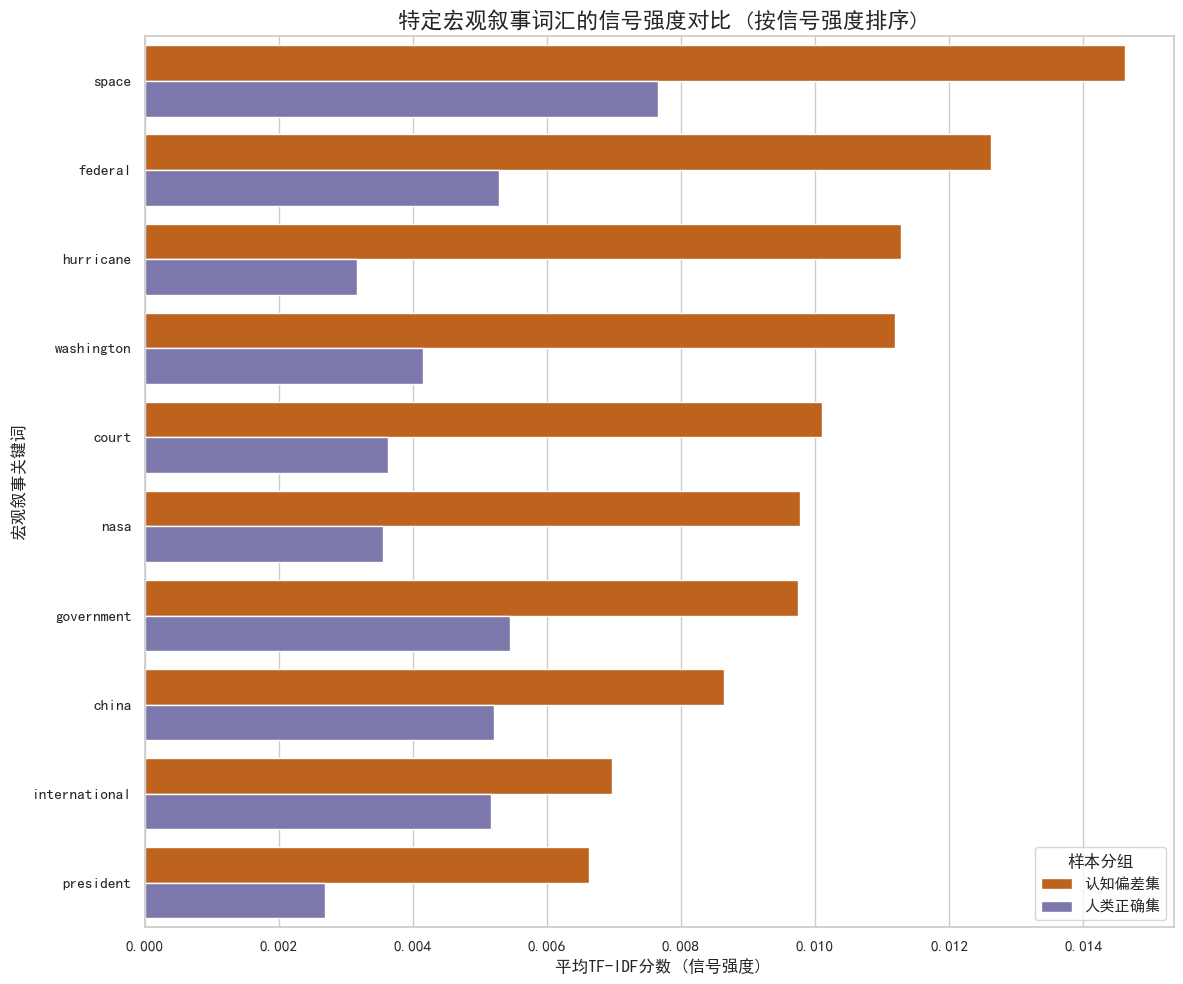


✅ 第二步完成。已根据您的手动选择生成最终图表。


In [24]:
# --- Level 2: Causal Attribution (使用human_label_1进行关键词发现) ---
print("\n--- 正在执行证据链第二步：归因分析 (使用新代表列) ---")

# ================================================================= #
#  核心修改点：更新Human和LLM的代表列                              #
# ================================================================= #
HUMAN_LABEL_COL = 'human_label_1'          # <-- 更新为人类原始标注
LLM_LABEL_COL = 'gemini_2.5_pro_label'   # <-- 更新为对比LLM

print(f"当前人类代表列: '{HUMAN_LABEL_COL}'")
print(f"当前LLM代表列: '{LLM_LABEL_COL}'")

# 1. 定义和准备数据集 (使用新的代表列)
target_classes = [2, 3]
fallback_label = 0
disagreement_set = df[
    (df[GROUND_TRUTH_COL].isin(target_classes)) &
    (df[HUMAN_LABEL_COL] == fallback_label) &
    (df[LLM_LABEL_COL] == df[GROUND_TRUTH_COL])
]
human_correct_set = df[
    (df[GROUND_TRUTH_COL].isin(target_classes)) &
    (df[HUMAN_LABEL_COL] == df[GROUND_TRUTH_COL])
]

print(f"找到新的 '认知偏差集' 样本: {len(disagreement_set)} 条")
print(f"找到新的 '人类正确集' (对照组) 样本: {len(human_correct_set)} 条")

# 2. TF-IDF分析 (代码不变, 数据已更新)
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
all_texts_for_fit = pd.concat([disagreement_set['text'], human_correct_set['text']])
vectorizer.fit(all_texts_for_fit)
feature_names = vectorizer.get_feature_names_out()

disagreement_matrix = vectorizer.transform(disagreement_set['text'])
correct_matrix = vectorizer.transform(human_correct_set['text'])
disagreement_avg_scores = np.array(disagreement_matrix.mean(axis=0)).flatten()
correct_avg_scores = np.array(correct_matrix.mean(axis=0)).flatten()

# --- 步骤 A: 关键词发现 ---

# 3. 创建包含所有分数的DataFrame
scores_df = pd.DataFrame({
    'keyword': feature_names,
    'score_bias_set': disagreement_avg_scores,
    'score_correct_set': correct_avg_scores
})

# 4. 计算分数差距，并筛选出“偏差集”分数更高者
scores_df['score_difference'] = scores_df['score_bias_set'] - scores_df['score_correct_set']
candidate_keywords_df = scores_df[scores_df['score_difference'] > 0].copy()

# 5. 按分数差距降序排列
candidate_keywords_df = candidate_keywords_df.sort_values(by='score_difference', ascending=False)

# 6. 打印全新的“候选关键词排行榜”供您选择
print("\n" + "="*60)
print("              全新候选关键词排行榜 (按分数差距排序)")
print(f"   (基于 Human='{HUMAN_LABEL_COL}', LLM='{LLM_LABEL_COL}')")
print("="*60)
print(candidate_keywords_df[['keyword', 'score_bias_set', 'score_correct_set', 'score_difference']].to_string())
print("="*60)


# --- 步骤 B: 手动选择与可视化 ---

# 7. 在这里定义您想展示的关键词列表
# !!! 警告：这是一个旧列表，您需要从上方新生成的排行榜中挑选并替换 !!!
MANUALLY_SELECTED_KEYWORDS = [
    'space', 'hurricane', 'federal', 'nasa', 'court', # 这是一个示例，请务必更新
    'washington', 'government', 'president', 'china', 'international'
]
print(f"\n请从上方新生成的排行榜中，挑选10-15个关键词更新 MANUALLY_SELECTED_KEYWORDS 列表，然后再次运行。")
print(f"当前示例列表包含 {len(MANUALLY_SELECTED_KEYWORDS)} 个关键词。")

# (后续绘图代码保持不变, 此处省略以便聚焦核心修改。运行时请使用上一轮回复中完整的代码)
# ... 完整的绘图代码 ...
# ... (为确保完整性，我将绘图代码附在下面) ...

# 8. 从候选池中筛选出您选择的关键词
selected_plot_df = candidate_keywords_df[
    candidate_keywords_df['keyword'].isin(MANUALLY_SELECTED_KEYWORDS)
].copy()

# 9. 整理数据格式
plot_data_melted = selected_plot_df.melt(
    id_vars='keyword', 
    value_vars=['score_bias_set', 'score_correct_set'],
    var_name='group',
    value_name='avg_tfidf_score'
)
plot_data_melted['group'] = plot_data_melted['group'].map({
    'score_bias_set': '认知偏差集',
    'score_correct_set': '人类正确集'
})

# 10. 计算排序顺序
if not plot_data_melted.empty:
    bias_set_data_for_sorting = plot_data_melted[plot_data_melted['group'] == '认知偏差集']
    plot_order = bias_set_data_for_sorting.sort_values(by='avg_tfidf_score', ascending=False)['keyword'].values

    # 11. 可视化
    plt.figure(figsize=(12, 10))
    sns.barplot(
        data=plot_data_melted, 
        x='avg_tfidf_score', 
        y='keyword', 
        hue='group', 
        palette={'认知偏差集': '#d95f02', '人类正确集': '#7570b3'},
        order=plot_order 
    )
    plt.title('特定宏观叙事词汇的信号强度对比 (按信号强度排序)', fontsize=16)
    plt.xlabel('平均TF-IDF分数 (信号强度)', fontsize=12)
    plt.ylabel('宏观叙事关键词', fontsize=12)
    plt.legend(title='样本分组')
    plt.tight_layout()
    plt.savefig("step2_tfidf_comparison_final.png", dpi=300)
    plt.show()
    print("\n✅ 第二步完成。已根据您的手动选择生成最终图表。")
else:
    print("\n⚠️ 在'MANUALLY_SELECTED_KEYWORDS'列表中没有找到任何有效的候选关键词，无法生成图表。请检查您的选择。")


--- 正在执行证据链第二步：归因分析 (最终排序版) ---
当前人类代表列: 'human_label_1'
当前LLM代表列: 'gemini_2.5_pro_label'
找到新的 '认知偏差集' 样本: 3904 条
找到新的 '人类正确集' (对照组) 样本: 16086 条

              全新候选关键词排行榜 (按分数差距排序)
   (基于 Human='human_label_1', LLM='gemini_2.5_pro_label')
             keyword  score_bias_set  score_correct_set  score_difference
136               ap        0.020560           0.009833      1.072741e-02
872        hurricane        0.011287           0.003173      8.114473e-03
1733         stewart        0.007936           0.000565      7.371242e-03
666          federal        0.012632           0.005284      7.347943e-03
1938      washington        0.011194           0.004149      7.045042e-03
1690           space        0.014624           0.007654      6.969549e-03
436            court        0.010102           0.003625      6.476905e-03
1104          martha        0.006901           0.000488      6.412763e-03
1177            nasa        0.009775           0.003552      6.223016e-03
271             bush

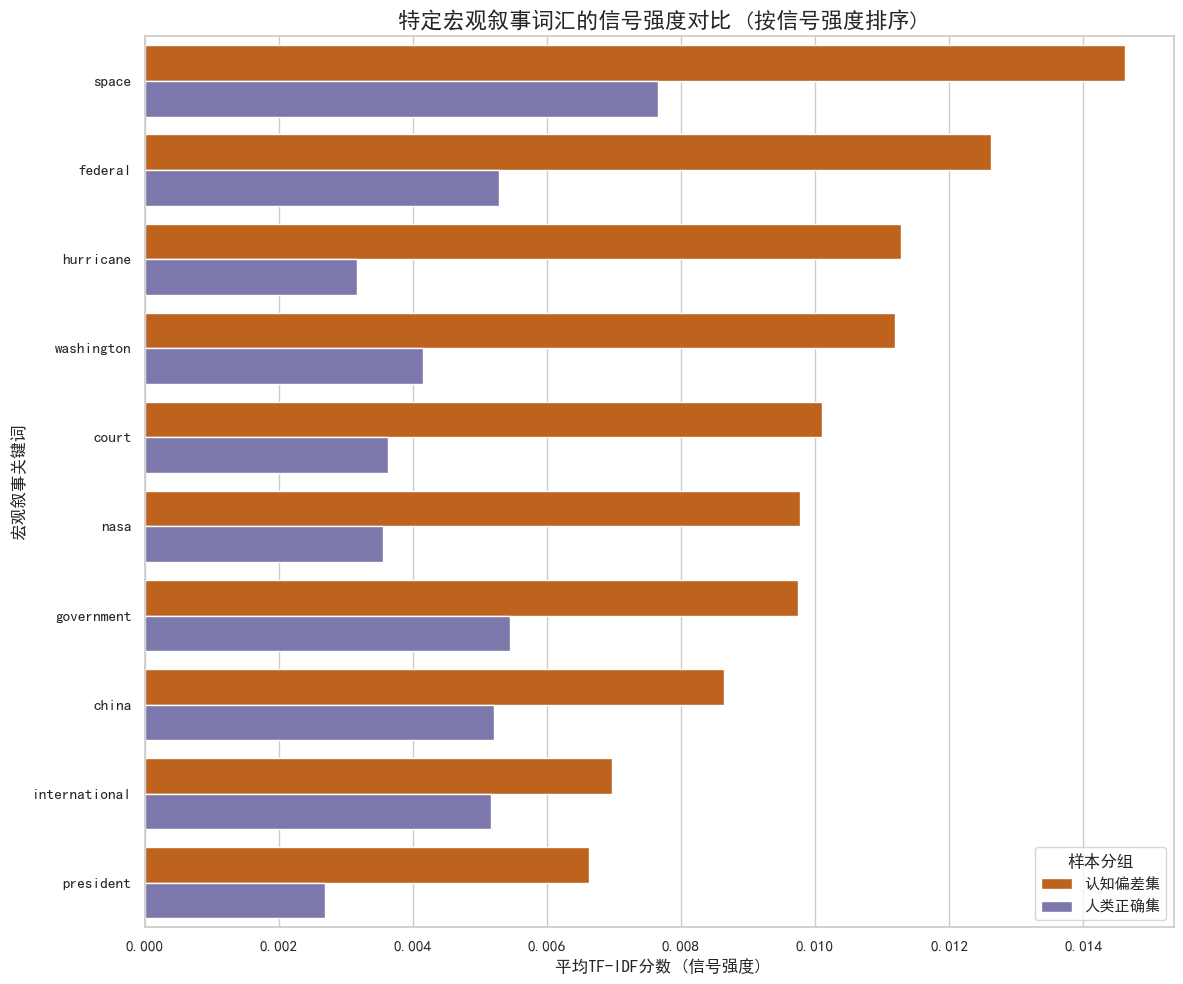


✅ 第二步完成。已生成排序后的最终美化图表。


In [25]:
# --- Level 2: Causal Attribution (最终排序美化版 + 数据保存) ---
print("\n--- 正在执行证据链第二步：归因分析 (最终排序版) ---")

# ================================================================= #
#  核心修改点：更新Human和LLM的代表列                              #
# ================================================================= #
HUMAN_LABEL_COL = 'human_label_1'          # <-- 更新为人类原始标注
LLM_LABEL_COL = 'gemini_2.5_pro_label'   # <-- 更新为对比LLM

print(f"当前人类代表列: '{HUMAN_LABEL_COL}'")
print(f"当前LLM代表列: '{LLM_LABEL_COL}'")

# 1. 定义和准备数据集 (使用新的代表列)
target_classes = [2, 3]
fallback_label = 0
disagreement_set = df[
    (df[GROUND_TRUTH_COL].isin(target_classes)) &
    (df[HUMAN_LABEL_COL] == fallback_label) &
    (df[LLM_LABEL_COL] == df[GROUND_TRUTH_COL])
]
human_correct_set = df[
    (df[GROUND_TRUTH_COL].isin(target_classes)) &
    (df[HUMAN_LABEL_COL] == df[GROUND_TRUTH_COL])
]

print(f"找到新的 '认知偏差集' 样本: {len(disagreement_set)} 条")
print(f"找到新的 '人类正确集' (对照组) 样本: {len(human_correct_set)} 条")

# 2. TF-IDF分析
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
all_texts_for_fit = pd.concat([disagreement_set['text'], human_correct_set['text']])
vectorizer.fit(all_texts_for_fit)
feature_names = vectorizer.get_feature_names_out()

disagreement_matrix = vectorizer.transform(disagreement_set['text'])
correct_matrix = vectorizer.transform(human_correct_set['text'])
disagreement_avg_scores = np.array(disagreement_matrix.mean(axis=0)).flatten()
correct_avg_scores = np.array(correct_matrix.mean(axis=0)).flatten()

# --- 步骤 A: 关键词发现 ---

# 3. 创建包含所有分数的DataFrame
scores_df = pd.DataFrame({
    'keyword': feature_names,
    'score_bias_set': disagreement_avg_scores,
    'score_correct_set': correct_avg_scores
})

# 4. 计算分数差距，并筛选出“偏差集”分数更高者
scores_df['score_difference'] = scores_df['score_bias_set'] - scores_df['score_correct_set']
candidate_keywords_df = scores_df[scores_df['score_difference'] > 0].copy()

# 5. 按分数差距降序排列
candidate_keywords_df = candidate_keywords_df.sort_values(by='score_difference', ascending=False)

# 6. 打印全新的“候选关键词排行榜”供您选择
print("\n" + "="*60)
print("              全新候选关键词排行榜 (按分数差距排序)")
print(f"   (基于 Human='{HUMAN_LABEL_COL}', LLM='{LLM_LABEL_COL}')")
print("="*60)
print(candidate_keywords_df[['keyword', 'score_bias_set', 'score_correct_set', 'score_difference']].to_string())
print("="*60)


# --- 步骤 B: 手动选择、保存数据与可视化 ---

# 7. 在这里定义您想展示的关键词列表 (请从上方新生成的排行榜中挑选并替换)
MANUALLY_SELECTED_KEYWORDS = [
    'space', 'hurricane', 'federal', 'nasa', 'court', # 这是一个示例，请务必更新
    'washington', 'government', 'president', 'china', 'international'
]
print(f"\n您已选择 {len(MANUALLY_SELECTED_KEYWORDS)} 个关键词进行分析。")

# 8. 从候选池中筛选出您选择的关键词
selected_plot_df = candidate_keywords_df[
    candidate_keywords_df['keyword'].isin(MANUALLY_SELECTED_KEYWORDS)
].copy()


# ================================================================= #
#  【新增功能】: 将用于绘图的数据保存到CSV文件                     #
# ================================================================= #
output_filename = "selected_keywords_plot_data.csv"
selected_plot_df.to_csv(output_filename, index=False, encoding='utf-8-sig')
print(f"✅ 用于绘图的核心数据已成功保存至: '{output_filename}'")
# ================================================================= #


# 9. 整理数据格式以进行可视化
plot_data_melted = selected_plot_df.melt(
    id_vars='keyword', 
    value_vars=['score_bias_set', 'score_correct_set'],
    var_name='group',
    value_name='avg_tfidf_score'
)
plot_data_melted['group'] = plot_data_melted['group'].map({
    'score_bias_set': '认知偏差集',
    'score_correct_set': '人类正确集'
})

# 10. 计算排序顺序
if not plot_data_melted.empty:
    bias_set_data_for_sorting = plot_data_melted[plot_data_melted['group'] == '认知偏差集']
    plot_order = bias_set_data_for_sorting.sort_values(by='avg_tfidf_score', ascending=False)['keyword'].values

    # 11. 可视化
    plt.figure(figsize=(12, 10))
    sns.barplot(
        data=plot_data_melted, 
        x='avg_tfidf_score', 
        y='keyword', 
        hue='group', 
        palette={'认知偏差集': '#d95f02', '人类正确集': '#7570b3'},
        order=plot_order 
    )
    plt.title('特定宏观叙事词汇的信号强度对比 (按信号强度排序)', fontsize=16)
    plt.xlabel('平均TF-IDF分数 (信号强度)', fontsize=12)
    plt.ylabel('宏观叙事关键词', fontsize=12)
    plt.legend(title='样本分组')
    plt.tight_layout()
    plt.savefig("step2_tfidf_comparison_final.png", dpi=300)
    plt.show()
    print("\n✅ 第二步完成。已生成排序后的最终美化图表。")
else:
    print("\n⚠️ 在'MANUALLY_SELECTED_KEYWORDS'列表中没有找到任何有效的候选关键词，无法生成图表。请检查您的选择。")

C:\Users\15529\AppData\Local\Temp\ipykernel_2792\1155133686.py:92: UserWarning: Glyph 35748 (\N{CJK UNIFIED IDEOGRAPH-8BA4}) missing from current font.
  plt.tight_layout()
C:\Users\15529\AppData\Local\Temp\ipykernel_2792\1155133686.py:92: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from current font.
  plt.tight_layout()
C:\Users\15529\AppData\Local\Temp\ipykernel_2792\1155133686.py:92: UserWarning: Glyph 20559 (\N{CJK UNIFIED IDEOGRAPH-504F}) missing from current font.
  plt.tight_layout()
C:\Users\15529\AppData\Local\Temp\ipykernel_2792\1155133686.py:92: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  plt.tight_layout()
C:\Users\15529\AppData\Local\Temp\ipykernel_2792\1155133686.py:92: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.tight_layout()
C:\Users\15529\AppData\Local\Temp\ipykernel_2792\1155133686.py:92: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing fr


✅ 已成功保存为高质量PDF文件: 'figure_tfidf_comparison_final.pdf' (已去除边缘空白)
✅ 已成功保存为高质量PNG文件: 'figure_tfidf_comparison_final.png' (已去除边缘空白)


d:\soft\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35748 (\N{CJK UNIFIED IDEOGRAPH-8BA4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\soft\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\soft\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20559 (\N{CJK UNIFIED IDEOGRAPH-504F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\soft\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\soft\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\soft\anaconda\lib\site-pack

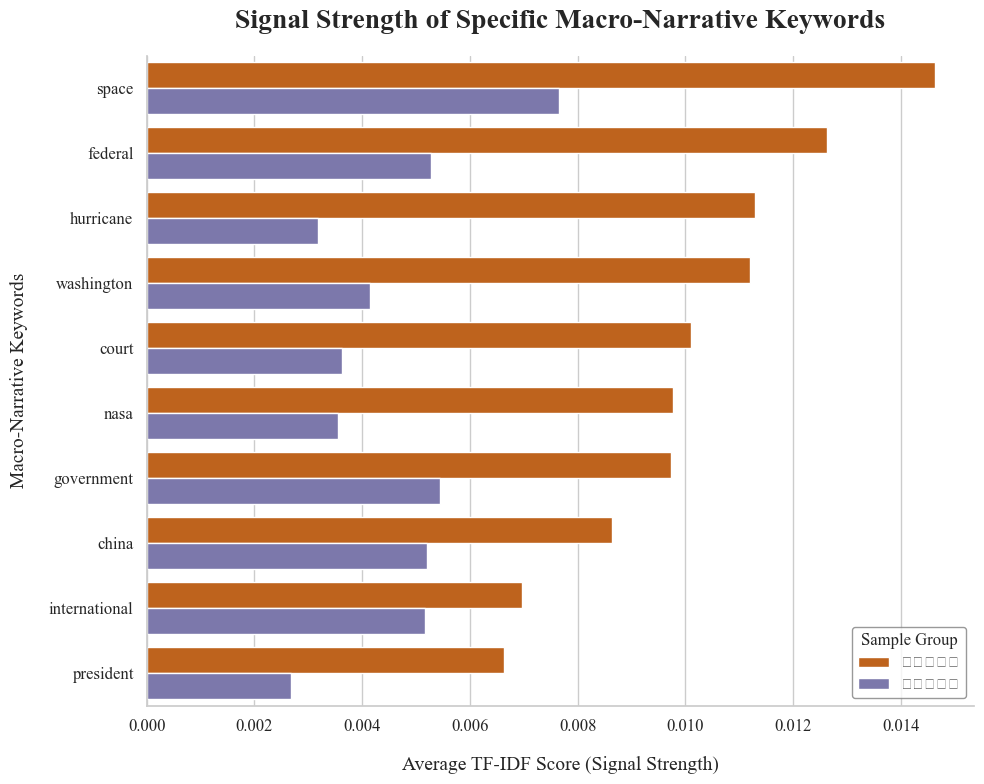


✅ 第二步完成。已生成最终的、高度定制化的图表。


In [26]:
# (您的脚本前面部分保持不变, 从第10步开始替换)
# ...
# plot_data_melted = ... (这部分数据准备不变)
# ...

# 10. 计算排序顺序 (代码不变)
if not plot_data_melted.empty:
    bias_set_data_for_sorting = plot_data_melted[plot_data_melted['group'] == '认知偏差集']
    plot_order = bias_set_data_for_sorting.sort_values(by='avg_tfidf_score', ascending=False)['keyword'].values

    # ========================================================================= #
    #                                                                           #
    #             【高度定制化绘图区域】 - 在这里修改所有参数                   #
    #                                                                           #
    # ========================================================================= #

    # --- 1. 字体设置 ---
    # 设置全局字体为 Times New Roman，如果系统没有，会回退到默认无衬线字体
    try:
        plt.rcParams['font.family'] = 'Times New Roman'
    except:
        print("警告: 系统中未找到 'Times New Roman' 字体, 将使用默认字体。")
    plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

    # --- 2. 核心参数控制面板 ---
    
    # -> 图像尺寸与分辨率
    FIG_WIDTH = 10           # 图像宽度 (英寸)
    FIG_HEIGHT = 8           # 图像高度 (英寸)
    DPI_RESOLUTION = 300     # 图像分辨率 (DPI)

    # -> 颜色控制
    PALETTE = {
        '认知偏差集': '#d95f02',   # 橙色 (可修改为 'orange', 'rgb(217,95,2)' 等)
        '人类正确集': '#7570b3'    # 紫色 (可修改为 'purple', 'rgb(117,112,179)' 等)
    }

    # -> 字体大小控制
    TITLE_FONTSIZE = 20      # 主标题字体大小
    AXIS_LABEL_FONTSIZE = 14 # X, Y轴标签字体大小
    TICK_LABEL_FONTSIZE = 12 # X, Y轴刻度字体大小
    LEGEND_TITLE_FONTSIZE = 12 # 图例标题字体大小
    LEGEND_TEXT_FONTSIZE = 11  # 图例文字字体大小
    
    # -> 文本内容控制
    PLOT_TITLE = 'Signal Strength of Specific Macro-Narrative Keywords' # 主标题
    X_AXIS_LABEL = 'Average TF-IDF Score (Signal Strength)'            # X轴标签
    Y_AXIS_LABEL = 'Macro-Narrative Keywords'                          # Y轴标签
    LEGEND_TITLE = 'Sample Group'                                      # 图例标题

    # -> 文件保存设置
    OUTPUT_FILENAME_PDF = "figure_tfidf_comparison_final.pdf"
    OUTPUT_FILENAME_PNG = "figure_tfidf_comparison_final.png"

    # --- 3. 开始绘图 (使用上方定义的参数) ---
    
    # 创建画布
    plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

    # 使用Seaborn绘制条形图
    ax = sns.barplot(
        data=plot_data_melted, 
        x='avg_tfidf_score', 
        y='keyword', 
        hue='group', 
        palette=PALETTE,
        order=plot_order 
    )

    # 设置标题和标签，并应用字体大小
    ax.set_title(PLOT_TITLE, fontsize=TITLE_FONTSIZE, weight='bold', pad=20)
    ax.set_xlabel(X_AXIS_LABEL, fontsize=AXIS_LABEL_FONTSIZE, labelpad=15)
    ax.set_ylabel(Y_AXIS_LABEL, fontsize=AXIS_LABEL_FONTSIZE, labelpad=15)

    # 设置刻度的字体大小
    ax.tick_params(axis='x', labelsize=TICK_LABEL_FONTSIZE)
    ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE)

    # 自定义图例
    legend = ax.legend(
        title=LEGEND_TITLE,
        fontsize=LEGEND_TEXT_FONTSIZE,
        title_fontsize=LEGEND_TITLE_FONTSIZE,
        frameon=True,         # 是否显示图例边框
        edgecolor='gray'      # 图例边框颜色
    )

    # 移除图表的顶部和右侧边框，使风格更简洁
    sns.despine()

    # 调整布局以确保所有元素都清晰显示
    plt.tight_layout()

    # --- 4. 保存为PDF (去除边缘空白) 和 PNG ---
    
    # 保存为PDF格式，bbox_inches='tight' 是去除边缘空白的关键
    plt.savefig(
        OUTPUT_FILENAME_PDF, 
        format='pdf', 
        dpi=DPI_RESOLUTION, 
        bbox_inches='tight', # 自动裁剪边缘空白
        pad_inches=0.05      # 在裁剪后保留一个极小的边距
    )
    print(f"\n✅ 已成功保存为高质量PDF文件: '{OUTPUT_FILENAME_PDF}' (已去除边缘空白)")
    
    # 同时保存一份PNG格式，方便快速查看
    plt.savefig(
        OUTPUT_FILENAME_PNG, 
        dpi=DPI_RESOLUTION,
        bbox_inches='tight',
        pad_inches=0.05
    )
    print(f"✅ 已成功保存为高质量PNG文件: '{OUTPUT_FILENAME_PNG}' (已去除边缘空白)")

    # 显示图表
    plt.show()
    
    print("\n✅ 第二步完成。已生成最终的、高度定制化的图表。")
else:
    print("\n⚠️ 在'MANUALLY_SELECTED_KEYWORDS'列表中没有找到任何有效的候选关键词，无法生成图表。请检查您的选择。")

In [23]:
# --- Level 3: Qualitative Validation (高级案例查找版) ---
print("\n--- 正在执行证据链第三步：定性验证 (高级案例查找版) ---")

# 1. 定义您在第二步中最终选定的18个关键词
# 这个列表现在是筛选案例的核心依据

print(f"将从“认知偏差集”中查找包含以下 {len(MANUALLY_SELECTED_KEYWORDS),MANUALLY_SELECTED_KEYWORDS} 个关键词中至少一个的样本...")

# 2. 创建一个用于字符串匹配的正则表达式
# 格式为: (keyword1|keyword2|...)， `|` 表示“或”
# re.escape是为了处理可能存在的特殊字符，虽然这里没有，但这是个好习惯
import re
regex_pattern = '|'.join([re.escape(word) for word in MANUALLY_SELECTED_KEYWORDS])

# 3. 从“认知偏差集”(disagreement_set)中筛选包含这些关键词的样本
# .str.contains() 函数用于文本匹配
# case=False 表示不区分大小写 (例如 Federal 和 federal 都能匹配到)
# na=False 表示如果文本为空则不匹配，避免报错
relevant_cases = disagreement_set[
    disagreement_set['text'].str.contains(regex_pattern, case=False, na=False)
].copy()

print(f"共找到 {len(relevant_cases)} 条相关案例。")

# 4. 设置您希望打印的案例数量
# 您可以自由修改这个数字，例如改成 5, 20, 或 200
NUM_SAMPLES_TO_PRINT = 100

# 5. 打印指定数量的案例
print(f"\n--- 以下是前 {NUM_SAMPLES_TO_PRINT} 条最相关的典型案例 ---")

# 设置Pandas显示选项，以便能看到完整的文本内容
pd.set_option('display.max_colwidth', None) # None表示不限制宽度

# 使用 .head() 来获取前N条，如果找到的案例少于N，则全部显示
# 使用 .reset_index(drop=True) 来重新编号，让输出更整洁
case_studies_to_print = relevant_cases.head(NUM_SAMPLES_TO_PRINT).reset_index(drop=True)

if case_studies_to_print.empty:
    print("未找到包含指定关键词的案例。")
else:
    for i, row in case_studies_to_print.iterrows():
        # print(f"\n--- 案例 {i+1} ---")
        # print(f"真实标签: {CLASS_NAMES[row[GROUND_TRUTH_COL]]} ({row[GROUND_TRUTH_COL]})")
        # print(f"人类标签: {CLASS_NAMES[row[HUMAN_LABEL_COL]]} ({row[HUMAN_LABEL_COL]})  <-- 错误")
        # print(f"LLM 标签: {CLASS_NAMES[row[LLM_LABEL_COL]]} ({row[LLM_LABEL_COL]})  <-- 正确")
        
        # 为了方便您分析，我们高亮显示文本中的关键词
        highlighted_text = row['text']
        for keyword in MANUALLY_SELECTED_KEYWORDS:
            # 使用 re.sub 进行不区分大小写的高亮替换
            highlighted_text = re.sub(f'({re.escape(keyword)})', r'>>\1<<', highlighted_text, flags=re.IGNORECASE)
        
        # print(f"文本内容 (关键词已高亮):\n{highlighted_text}\n")
        if len(highlighted_text) < 300:
            print(f"\n{highlighted_text}\n")
        

print(f"✅ 第三步完成。已展示 {len(case_studies_to_print)} 条案例。如果需要更多，请修改 NUM_SAMPLES_TO_PRINT 变量。")


--- 正在执行证据链第三步：定性验证 (高级案例查找版) ---
将从“认知偏差集”中查找包含以下 (10, ['space', 'hurricane', 'federal', 'nasa', 'court', 'washington', 'government', 'president', 'china', 'international']) 个关键词中至少一个的样本...
共找到 1478 条相关案例。

--- 以下是前 100 条最相关的典型案例 ---

Oil prices soar to all-time record, posing new menace to US economy (AFP) . AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US >>president<<ial elections.


Fed minutes show dissent over inflation (USATODAY.com) . USATODAY.com - Retail sales bounced back a bit in July, and new claims for jobless benefits fell last week, the >>government<< said Thursday, indicating the economy is improving from a midsummer slump.


Somewhere between gleam and gloom . >>President<< Bush has been saying that the US economy has ''turned the corner. quot; Democratic >>president<<ial candidate Senator John F. Kerry, in the wake of this month's poor jobs report, quipped that it was more like 

In [4]:
noise_sameNTM_med = df_loaded['noise_sameNTM_med'].tolist()
noise_instance_med = df_loaded['noise_instance_med'].tolist()
print(accuracy_score(noise_sameNTM_med,noise_instance_med))

0.65086


In [5]:
human1 = df_loaded['human_label_1'].tolist()
human2 = df_loaded['human_label_2'].tolist()
human3 = df_loaded['human_label_3'].tolist()

gpt4_label = df_loaded['gpt4_label'].tolist()
claude4_label = df_loaded['claude4_label'].tolist()
gemini_25_pro_label = df_loaded['gemini_2.5_pro_label'].tolist()


mistral_3b_label = df_loaded['mistral_3b_label'].tolist()
mistral_8b_label = df_loaded['mistral_8b_label'].tolist()
mistral_latest_label = df_loaded['mistral_latest_label'].tolist()


mistral_8b_temp15_run1 = df_loaded['mistral_8b_temp1.5_run1'].tolist()
mistral_8b_temp15_run2 = df_loaded['mistral_8b_temp1.5_run2'].tolist()
mistral_8b_temp15_run3 = df_loaded['mistral_8b_temp1.5_run3'].tolist()

ground_truth = df_loaded['ground_truth'].tolist()

0.89524


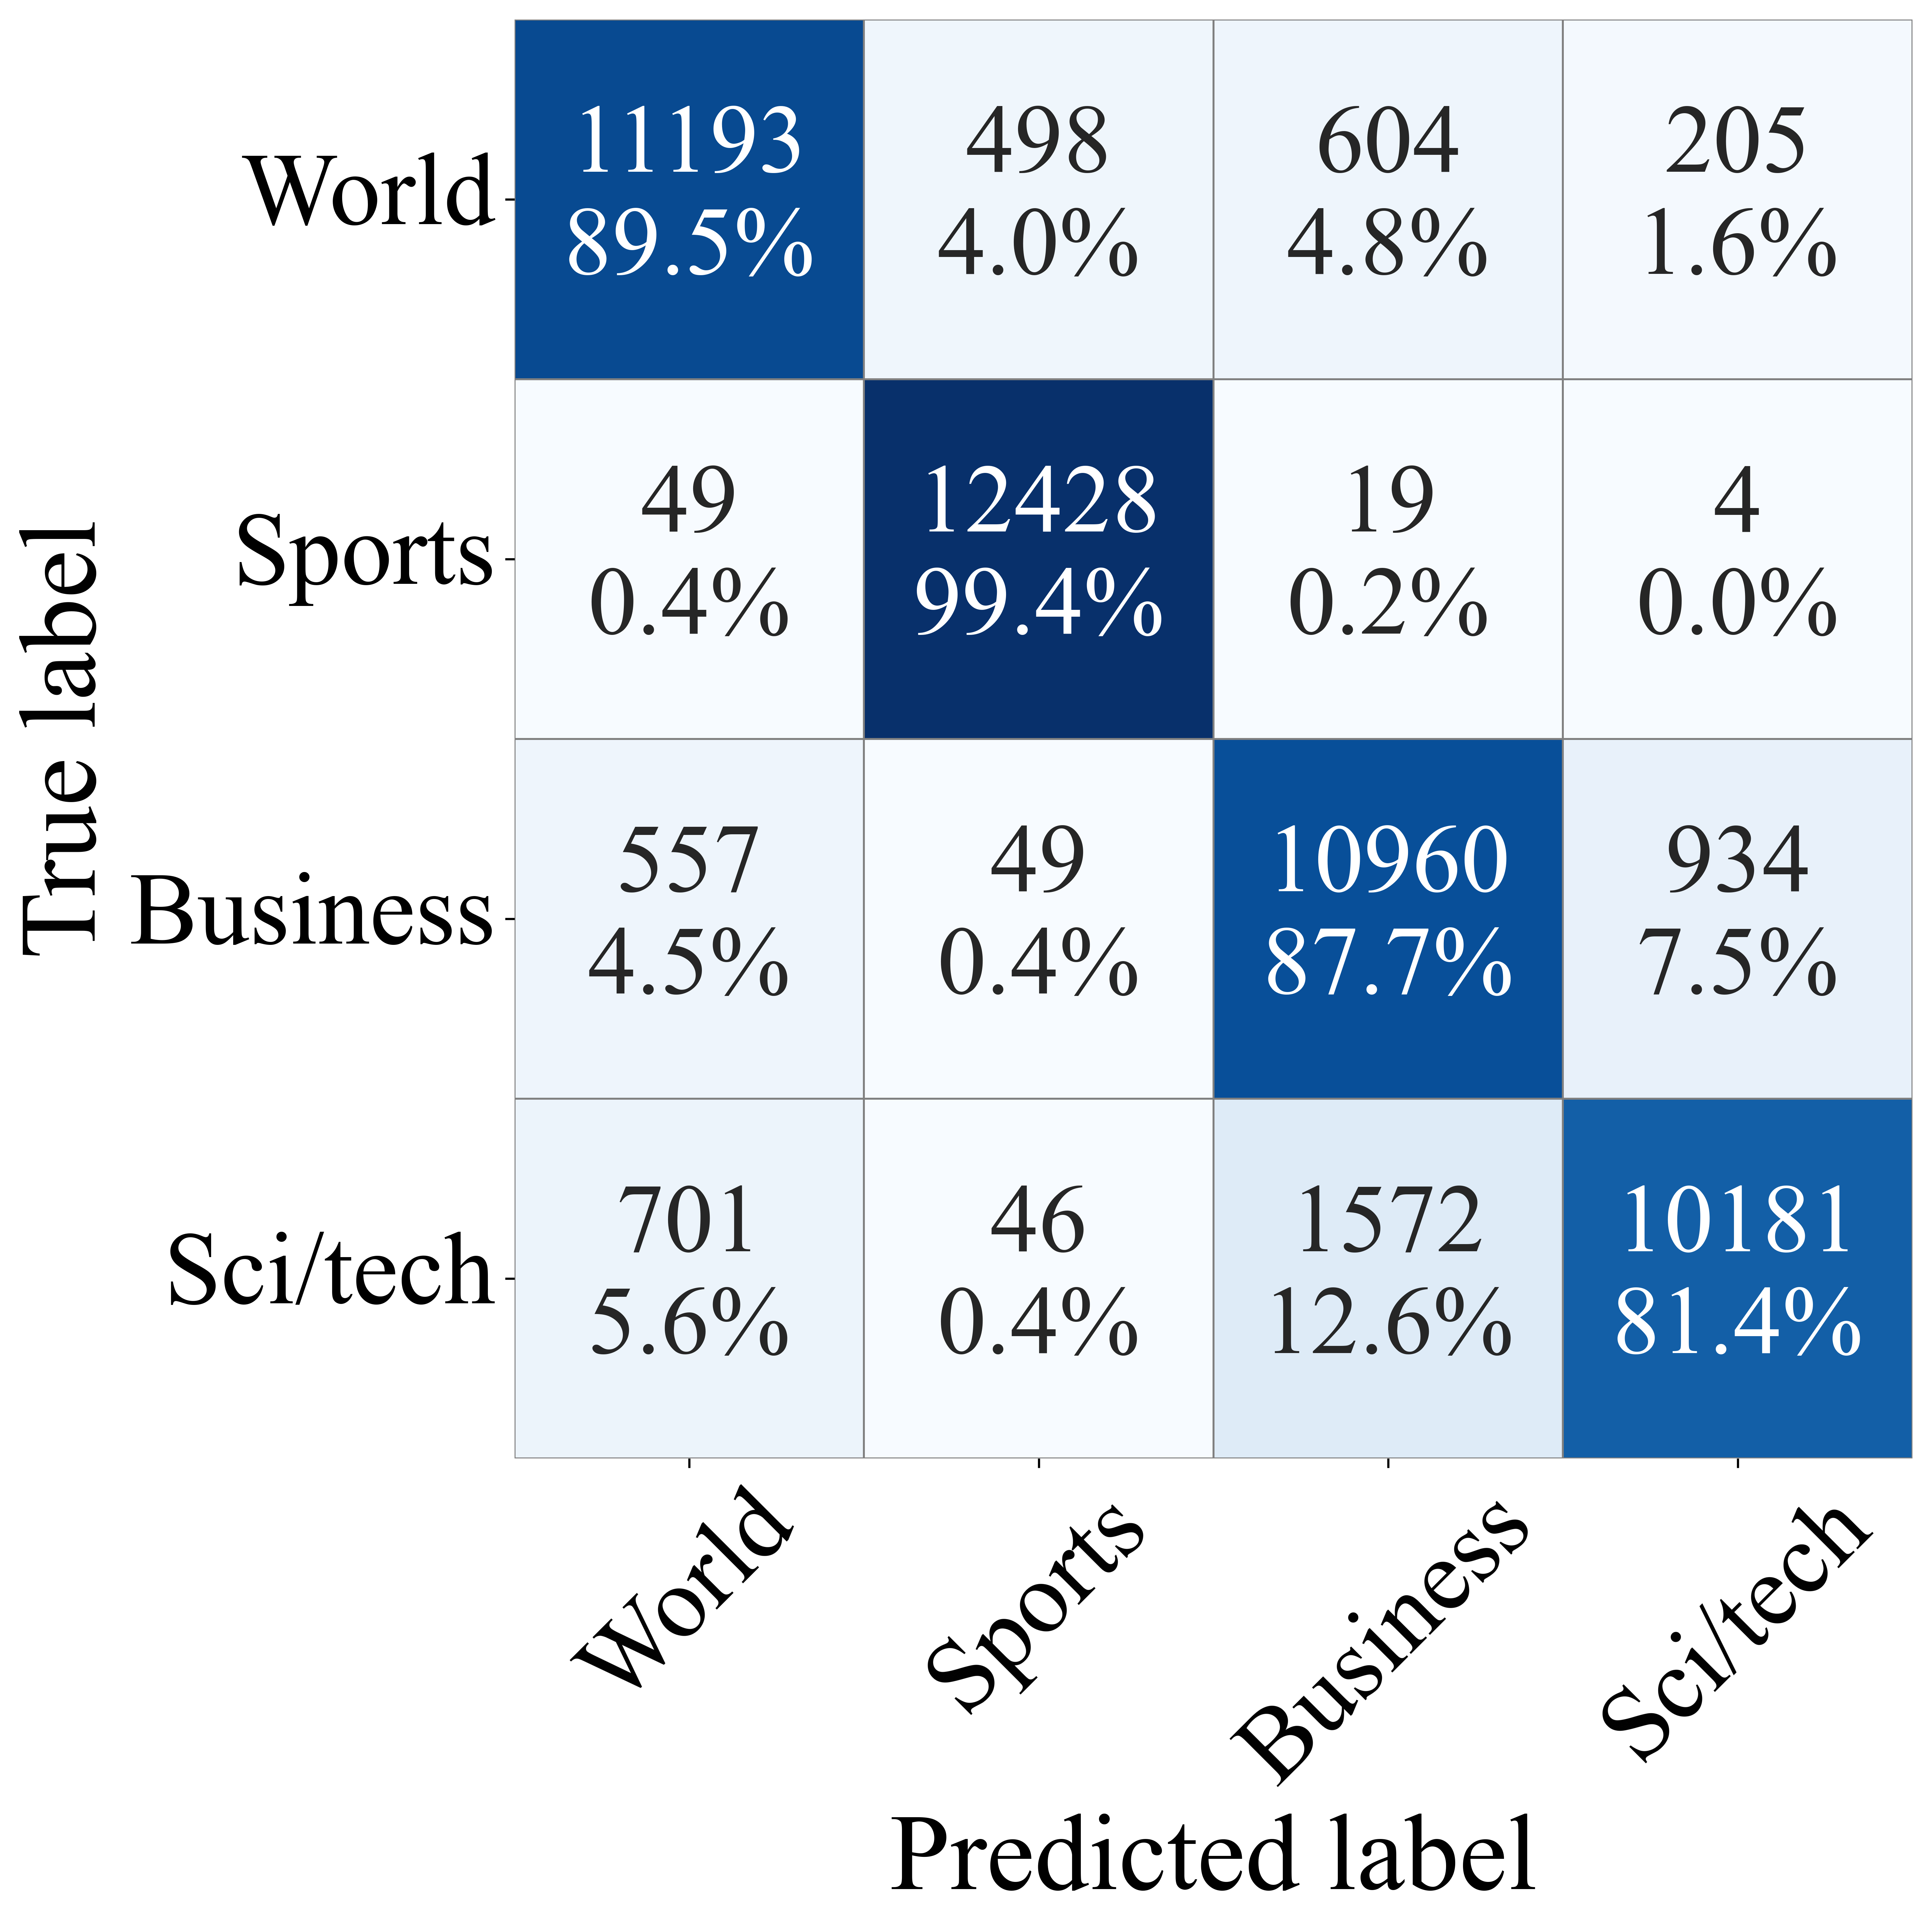

In [6]:
import numpy as np
# print(confusion_matrix(gt,bestL))
print(accuracy_score(ground_truth,claude4_label))
conf_mat = np.array(confusion_matrix(ground_truth,claude4_label))  
row_sums = conf_mat.sum(axis=1, keepdims=True)
annot = np.empty_like(conf_mat, dtype=object)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        percent = conf_mat[i, j] / row_sums[i, 0] * 100
        annot[i, j] = f"{conf_mat[i, j]}\n{percent:.1f}%"
FIG_SIZE = (10,10)
ANNOT_FONT_SIZE = 36
TICK_FONT_SIZE = 38
LABEL_FONT_SIZE = 40
categories = ["World","Sports","Business","Sci/tech"]
FONT_FAMILY = "Times New Roman"

plt.figure(figsize=FIG_SIZE, dpi=600) 
ax = sns.heatmap(
    conf_mat, 
    annot=annot,
    fmt='', 
    cmap='Blues',
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'size': ANNOT_FONT_SIZE, 'fontname': FONT_FAMILY}
)

ax.set_xticklabels(categories, rotation=45, fontsize=TICK_FONT_SIZE,fontname=FONT_FAMILY)
ax.set_yticklabels(categories, rotation=0, fontsize=TICK_FONT_SIZE,fontname=FONT_FAMILY)
ax.set_xlabel('Predicted label', fontsize=LABEL_FONT_SIZE, fontname=FONT_FAMILY)
ax.set_ylabel('True label', fontsize=LABEL_FONT_SIZE, fontname=FONT_FAMILY)
# ax.set_title('Confusion Matrix', fontsize=TITLE_FONT_SIZE, fontname=FONT_FAMILY, pad=20)
plt.tight_layout()
plt.show()

In [7]:
print(df_loaded.columns)

Index(['sample_index', 'text', 'ground_truth', 'human_label_1',
       'human_label_2', 'human_label_3', 'human_best_label',
       'human_middle_label', 'human_worst_label', 'gemini_2.5_pro_label',
       'gpt4_label', 'claude4_label', 'SOTA_llm_best_label',
       'SOTA_llm_middle_label', 'SOTA_llm_worst_label', 'mistral_3b_label',
       'mistral_8b_label', 'mistral_latest_label', 'mistral_multi_best_label',
       'mistral_multi_middle_label', 'mistral_multi_worst_label',
       'mistral_8b_temp1.5_run1', 'mistral_8b_temp1.5_run2',
       'mistral_8b_temp1.5_run3', 'mistral_8b_best_label',
       'mistral_8b_middle_label', 'mistral_8b_worst_label',
       'noise_instance_best', 'noise_instance_med', 'noise_instance_worst',
       'noise_sameNTM_best', 'noise_sameNTM_med', 'noise_sameNTM_worst',
       'noise_single_best', 'noise_single_med', 'noise_single_worst',
       'noise_uniform_best', 'noise_uniform_med', 'noise_uniform_worst'],
      dtype='object')


In [13]:
# human1 = df_loaded['human_label_1'].tolist()
# human2 = df_loaded['human_label_2'].tolist()
# human3 = df_loaded['human_label_3'].tolist()

# gpt4_label = df_loaded['gpt4_label'].tolist()
# claude4_label = df_loaded['claude4_label'].tolist()
# gemini_25_pro_label = df_loaded['gemini_2.5_pro_label'].tolist()


# mistral_3b_label = df_loaded['mistral_3b_label'].tolist()
# mistral_8b_label = df_loaded['mistral_8b_label'].tolist()
#   = df_loaded['mistral_latest_label'].tolist()


# mistral_8b_temp15_run1 = df_loaded['mistral_8b_temp1.5_run1'].tolist()
# mistral_8b_temp15_run2 = df_loaded['mistral_8b_temp1.5_run2'].tolist()
# mistral_8b_temp15_run3 = df_loaded['mistral_8b_temp1.5_run3'].tolist()

# ground_truth = df_loaded['ground_truth'].tolist()

human_labels = human1 + human2 + human3
SOTA_llm_labels = gpt4_label + claude4_label + gemini_25_pro_label
T8B = mistral_8b_temp15_run1 + mistral_8b_temp15_run2 + mistral_8b_temp15_run3
mutiLLM = mistral_3b_label + mistral_8b_label + mistral_latest_label

[37012, 39282, 44507, 29199]


C:\Users\15529\AppData\Local\Temp\ipykernel_9956\1550891726.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, fontsize=TICK_FONT_SIZE, rotation=45, ha='right') # ha='right' 让标签对齐得更好


(0.0, 48957.700000000004)

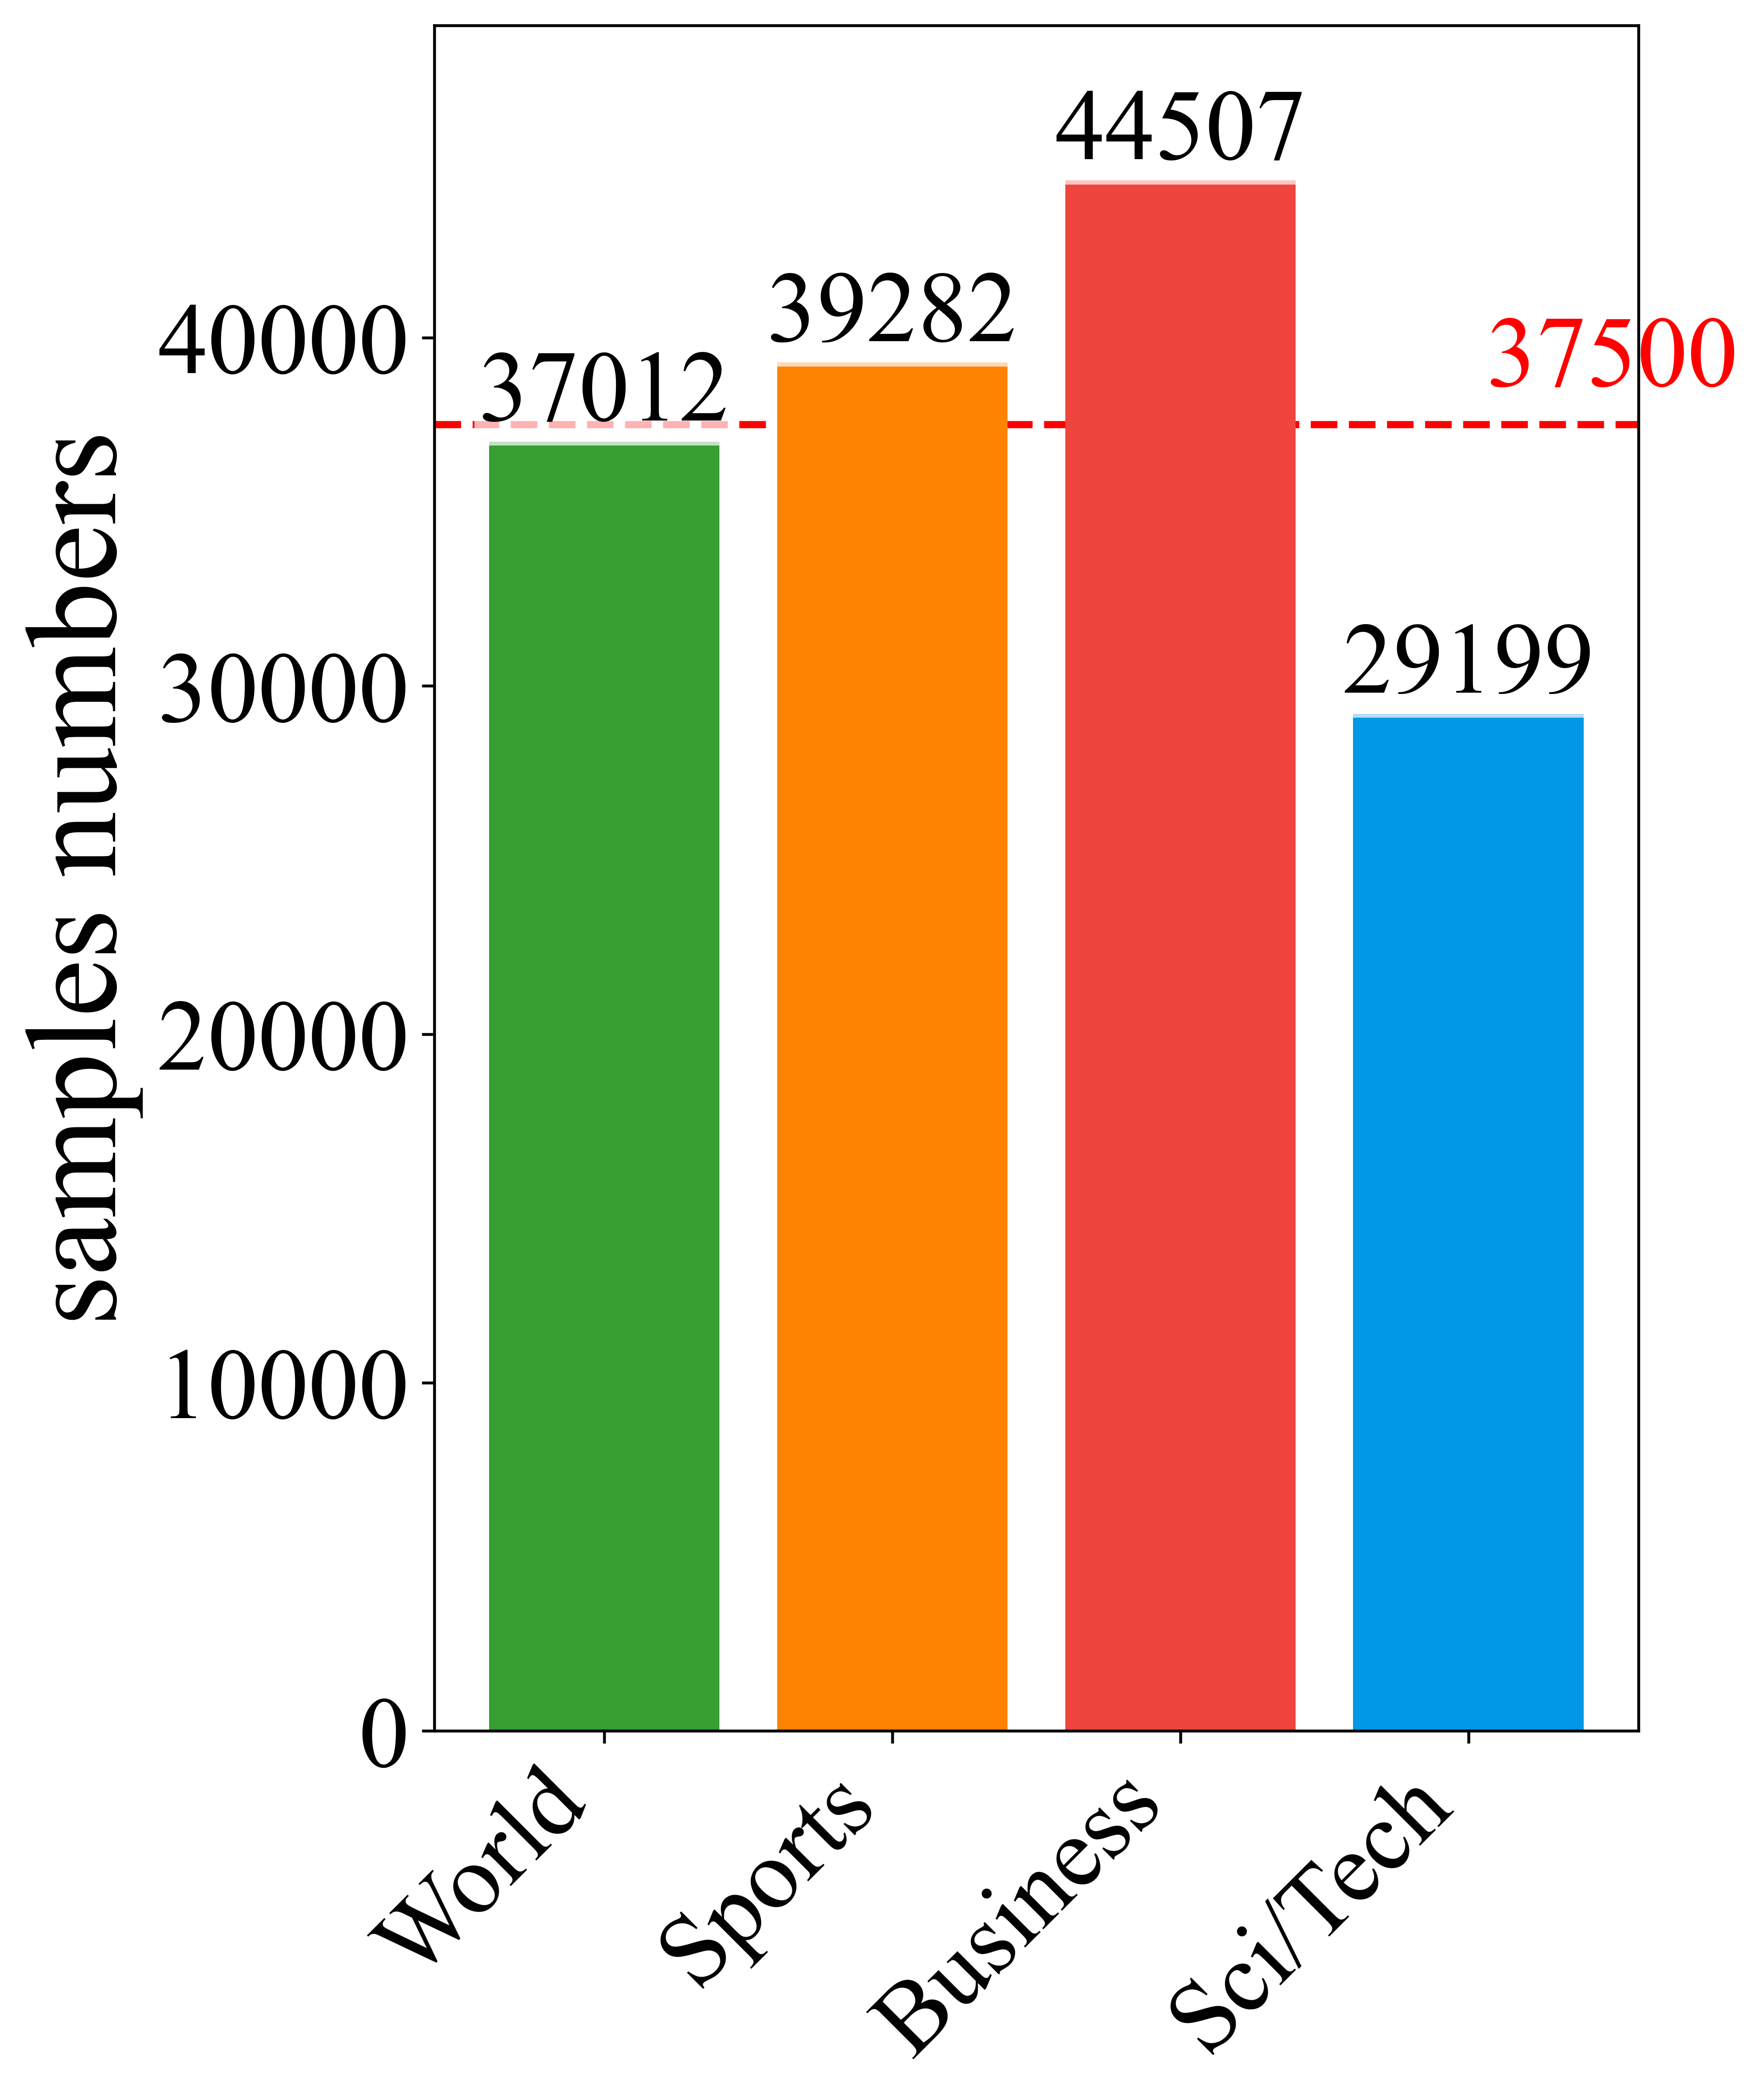

In [25]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.ticker as mticker # 导入 ticker 模块用于格式化坐标轴
label_counter = Counter(SOTA_llm_labels)
# ======================= 参数区 =======================
FONT_FAMILY = 'Times New Roman'
TITLE_FONT_SIZE = 40
LABEL_FONT_SIZE = 36
TICK_FONT_SIZE = 28
TEXT_FONT_SIZE = 28

FIG_SIZE = (6.7,8)
DPI = 600

# ======================= 你的数据区 =======================
# 假设这是您的数据 (这里使用您图中的数据作为示例)
# human_labels = [...] 
# 假设 Counter 统计结果如下：

# counts = [49163, 37135, 37073, 26629]

categories = ['World', 'Sports', 'Business', 'Sci/Tech']
counts = [label_counter[i] for i in range(4)]
print(counts)

categories = ['World', 'Sports', 'Business', 'Sci/Tech']

custom_bar_colors = [
    (55/255, 158/255, 49/255),
    (254/255, 131/255, 2/255),
    (239/255, 69/255, 62/255),
    (0/255, 151/255, 230/255),
]

# ======================= 绘图区 =======================
plt.rcParams['font.family'] = FONT_FAMILY

fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI, constrained_layout=True)

# 为了解决重叠问题，我们使用 zorder 参数来控制绘图元素的层级
# zorder 值越大，越显示在顶层。我们让柱子在中间，红线在最底层。
bars = ax.bar(categories, counts, color=custom_bar_colors, zorder=2)

ax.set_xticklabels(categories, fontsize=TICK_FONT_SIZE, rotation=45, ha='right') # ha='right' 让标签对齐得更好
# ax.set_yticklabels(ax.get_yticks(), fontsize=TICK_FONT_SIZE) # 这行可以被下面的 formatter 代替

# ================== [修改一：解决 Y 轴浮点数问题] ==================
# 使用 FuncFormatter 将 Y 轴的刻度标签格式化为整数
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
ax.tick_params(axis='y', labelsize=TICK_FONT_SIZE) # 统一设置 Y 轴刻度字体大小

# ================== [修改二：解决红线与文字重叠问题] ==================
# 循环遍历柱子，在顶部添加计数值
for bar, count in zip(bars, counts):
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(),
        str(count), 
        ha='center', 
        va='bottom', 
        fontsize=TEXT_FONT_SIZE, 
        fontname=FONT_FAMILY,
        # 关键：添加一个白色、半透明的背景框，并提高 zorder 让它显示在最顶层
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1.0),
        zorder=3 
    )

# ax.set_title("Label Distribution by Human Annotation", fontsize=TITLE_FONT_SIZE, fontname=FONT_FAMILY)
ax.set_ylabel("samples numbers", fontsize=LABEL_FONT_SIZE, fontname=FONT_FAMILY)

# ======== 画虚线红线，并添加文本标注 ========
yline = 37500
# 将红线的 zorder 设置为 1，让它位于最底层，不会干扰其他元素
ax.axhline(y=yline, color='red', linestyle='--', linewidth=2, zorder=1)

# 在图的右侧标注37500（yline），竖直稍上移防止和线重叠
ax.text(
    len(categories) - 0.5,   # x轴位置，调整到最后一个bar的中心
    yline + 500,             # y轴位置，略微在线上方
    str(yline),
    color='red',
    fontsize=TEXT_FONT_SIZE,
    va='bottom', 
    ha='center', # ha='center' 让它对齐最后一个bar的中心
    fontname=FONT_FAMILY
)

# 确保 Y 轴的上限足够高，能容纳最高的柱子和文字
ax.set_ylim(0, max(counts) * 1.1)